## <center style="font-family: consolas; font-size: 32px; font-weight: bold;">Heartbeat Anomoly Detection Using Heart Beat Sound</center>
<p><center style="color:#949494; font-family: consolas; font-size: 20px;">
    </center></p>

***

# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">Sanjana WG </center>
# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">Deekshith B </center>

# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">Aakanksha V R </center>


In [2]:
!pip install librosa
!pip install resampy
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement resampy (from versions: none)
ERROR: No matching distribution found for resampy


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import os
import glob
import numpy as np
import math
import itertools
import pandas as pd 
import fnmatch

from scipy.io import wavfile
import librosa, librosa.display
import IPython.display as ipd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [12]:
metadataA= pd.read_csv("/kaggle/input/heartbeat-sounds/set_a.csv")

In [13]:
metadataA.head()

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [14]:
metadataA.label.value_counts()

label
artifact    40
murmur      34
normal      31
extrahls    19
Name: count, dtype: int64

In [15]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=metadataA["label"] , marker_color="#DC143C"))
fig.update_layout(
    title="Meta data A",
    xaxis_title="Classes",
    yaxis_title="Count",
)

fig.show()

In [16]:
metadataA.isnull().sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

In [33]:
if "sublabel" in metadataA.columns:
    metadataA.drop("sublabel", inplace=True)


In [17]:
metadataA.shape

(176, 4)

In [18]:
metadataB = pd.read_csv("/kaggle/input/heartbeat-sounds/set_b.csv")

In [19]:
metadataB.head()

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [20]:
metadataB.label.value_counts()

label
normal        320
murmur         95
extrastole     46
Name: count, dtype: int64

In [21]:
metadataB.isnull().sum()

dataset       0
fname         0
label       195
sublabel    507
dtype: int64

In [22]:
metadataB.drop("sublabel", axis =1, inplace=True)

In [23]:
metadataB.shape

(656, 3)

In [24]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=metadataB["label"] , marker_color="#DC143C"))
fig.update_layout(
    title="Meta data B",
    xaxis_title="Classes",
    yaxis_title="Count",
)

fig.show()

In [25]:
dataset = []
for folder in ["../input/heartbeat-sounds/set_a/**","../input/heartbeat-sounds/set_b/**"]:
    for filename in glob.iglob(folder):         #Compares file pattern in folder to what is being fed
        if os.path.exists(filename):         
            label = os.path.basename(filename).split("_")[0]       #takes the label out, if you notice, you will realie
# skip audio smaller than 4 secs
       # if librosa.get_duration(filename=filename)>=4:
        if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
            dataset.append({
                            "filename": filename,
                            "label": label
                          })

df = pd.DataFrame(dataset)
df = shuffle(df, random_state=42)

In [27]:
df2 = pd.concat([metadataA.dropna(),metadataB.dropna()])

In [28]:
df2.shape

(461, 4)

In [29]:
df.shape 

(585, 2)

In [31]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["label"] , marker_color="#CD5C5C"))
fig.update_layout(
    title="Audio Distribution Combined",
    xaxis_title="Classes",
    yaxis_title="Count" 
)

fig.show()


In [32]:
df.shape

(585, 2)

In [34]:
dataset = []
for folder in ["../input/heartbeat-sounds/set_a/**","../input/heartbeat-sounds/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
# skip audio smaller than 4 secs
        if librosa.get_duration(filename=filename)>=4:
            if label not in ["Aunlabelledtest", "Bunlabelledtest"]:       #we remove the NaN values
                dataset.append({
                                "filename": filename,
                                "label": label
                              })

df = pd.DataFrame(dataset)
df = shuffle(df, random_state=42)

In [35]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["label"] , marker_color="#CD5C5C"))
fig.update_layout(
    title="Audio Distribution Combined",
    xaxis_title="Classes",
    yaxis_title="Count"    
)

fig.data[0].hovertext = "Count: " + df["label"].value_counts().to_string()

fig.show()

In [36]:
df.shape

(404, 2)

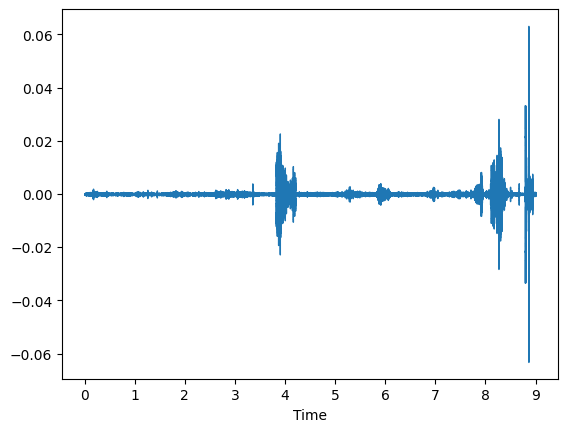

In [37]:
data,frame=librosa.load('/kaggle/input/heartbeat-sounds/set_a/Aunlabelledtest__201012172010.wav')
librosa.display.waveshow(data,sr=
                         frame)
ipd.Audio('/kaggle/input/heartbeat-sounds/set_a/Aunlabelledtest__201012172010.wav')

In [38]:
frame

22050

In [39]:
ad, sr_demo = librosa.load('/kaggle/input/heartbeat-sounds/set_a/Aunlabelledtest__201012172010.wav')

In [40]:
ad

array([-1.3300074e-04, -3.8742459e-05,  1.9526234e-04, ...,
        9.4768227e-05, -3.0561780e-05,  6.3747764e-05], dtype=float32)

In [41]:
mfcc_features = librosa.feature.mfcc(y=ad, sr=sr_demo, n_mfcc=120)

In [57]:
mfcc_features

array([[-7.06924316e+02, -6.67949585e+02, -6.70877014e+02, ...,
        -5.00196930e+02, -5.76922363e+02, -6.37969299e+02],
       [ 2.81231689e+01,  2.85532188e+01,  2.51491470e+01, ...,
         1.21713936e+02,  9.57189178e+01,  6.39696159e+01],
       [-1.64409103e+01, -1.27459259e+01, -1.68281746e+01, ...,
        -1.69453697e+01, -1.15862894e+01, -3.65353775e+00],
       ...,
       [-6.54792070e-01,  2.04109788e-01, -4.20506001e-02, ...,
         1.06477880e+00,  1.50218415e+00,  2.73750091e+00],
       [ 6.09621048e-01, -4.18885708e-01, -7.47130394e-01, ...,
         3.77946377e-01, -4.31340933e-01, -5.65829754e-01],
       [ 8.28670144e-01, -6.72820091e-01,  3.25356245e-01, ...,
        -5.70309877e-01, -1.47344828e+00, -3.71621847e+00]], dtype=float32)

<h2> Streching for Data Augmentation </h2>

When **Shrink** and **Strech** our audio by multiplying it by a factor of 0.8 and 1.2 respectively so that our model is more robust as it is expoused to some disturbance of the same features.

In [42]:

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs                                 
    normal_cutoff = cutoff / nyquist 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a                                                        #This function returns filtering coefficents

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y                   #This gives us filtered data

def audio_to_df_DPL(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []  #features will be added to this list

    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)        #checks if its in given label name
            label = name.split("*")[0]                              #takes the label name

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(filename=audio_path)                  #importing audio from path
 
                if duration > min_duration:                                           #Duration Clipping
                    x, sr = librosa.load(audio_path, duration=min_duration)
                    
                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)         # Apply the low-pass filter
                    
                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=128), axis=1)  # Extract MFCC features 
                    
                    
                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))              # other audio features
                    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=x_filtered, sr=sr))         
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))
                    
                    feature_list.append([*mfcc_features, zero_crossings, spectral_centroid, spectral_rolloff, chroma_stft, label, file])

                    # STRECHING FOR AGUMENTATION
                    
                    stretched_x_1 = librosa.effects.time_stretch(x_filtered, rate=0.8)
                    
                    mfcc_features_stretch_1 = np.mean(librosa.feature.mfcc(y=stretched_x_1, sr=sr, n_mfcc=128), axis=1)
                    
                    zero_crossings_stretch_1 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_1))         # Calculate other audio features for the time-stretched version
                    spectral_centroid_stretch_1 = np.mean(librosa.feature.spectral_centroid(y=stretched_x_1, sr=sr))
                    spectral_rolloff_stretch_1 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_1, sr=sr))
                    chroma_stft_stretch_1 = np.mean(librosa.feature.chroma_stft(y=stretched_x_1, sr=sr))
                    
                    feature_list.append([*mfcc_features_stretch_1, zero_crossings_stretch_1, spectral_centroid_stretch_1, spectral_rolloff_stretch_1, chroma_stft_stretch_1, label, file + "_stretch_0.8"])
                    
                    stretched_x_2 = librosa.effects.time_stretch(x_filtered, rate=1.2)  # Apply time-stretching with a factor of 1.2 to the filtered audio
                    
                   
                    mfcc_features_stretch_2 = np.mean(librosa.feature.mfcc(y=stretched_x_2, sr=sr, n_mfcc=128), axis=1)   # Extract MFCC features from the time-stretched audio
                    
        
                    zero_crossings_stretch_2 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_2))
                    spectral_centroid_stretch_2 = np.mean(librosa.feature.spectral_centroid(y=stretched_x_2, sr=sr))
                    spectral_rolloff_stretch_2 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_2, sr=sr))
                    chroma_stft_stretch_2 = np.mean(librosa.feature.chroma_stft(y=stretched_x_2, sr=sr))
                    
                    feature_list.append([*mfcc_features_stretch_2, zero_crossings_stretch_2, spectral_centroid_stretch_2, spectral_rolloff_stretch_2, chroma_stft_stretch_2, label, file + "_stretch_1.2"])

    return pd.DataFrame(feature_list, columns=columns)


In [43]:
def audio_to_df_DPL_withoutstrech(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []  # features will be added to this list

    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)  # checks if it's in the given label name
            label = name.split("*")[0]  # takes the label name

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(filename=audio_path)  # importing audio from path

                if duration > min_duration:  # Duration Clipping
                    x, sr = librosa.load(audio_path, duration=min_duration)

                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)  # Apply the low-pass filter

                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=120), axis=1)  # Extract MFCC features

                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))  # other audio features
                    spectral_centroid = np.mean(
                        librosa.feature.spectral_centroid(y=x_filtered, sr=sr))
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))

                    feature_list.append(
                        [*mfcc_features, zero_crossings, spectral_centroid, spectral_rolloff, chroma_stft, label, file])

    return pd.DataFrame(feature_list, columns=columns)



In [44]:
audio_folders = ["/kaggle/input/heartbeat-sounds/set_a/", "/kaggle/input/heartbeat-sounds/set_b/"]
columns = ["mfcc" + str(i) for i in range(128)]

for name in ["zero", "centroid", "rolloff", "chroma", "label", "file"]:
    columns.append(name)

type_list = ["normal*.wav", "artifact*.wav", "murmur*.wav", "extrastole*.wav" , "extrahls*.wav"]

In [45]:
audio_df = audio_to_df_DPL(audio_folders, columns, type_list)

In [46]:
audio_df.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -536.386440  53.564944  51.666319  49.582095  46.871201  43.633805   
1 -573.398035  53.312311  51.281136  49.177415  46.513018  43.277554   
2 -572.095339  53.968885  52.120298  49.815464  47.067992  43.796683   
3 -809.345572  56.360970  53.937996  50.063338  44.967755  38.946524   
4 -850.725712  59.581788  57.003577  52.884313  47.474236  41.092721   

       mfcc6      mfcc7      mfcc8      mfcc9  ...   mfcc124   mfcc125  \
0  39.893947  35.817816  31.545484  27.202732  ... -0.076462 -0.069278   
1  39.628010  35.593749  31.351990  27.042946  ... -0.132923 -0.133456   
2  40.070375  35.955711  31.641512  27.316056  ... -0.026224 -0.024721   
3  32.335153  25.482700  18.725322  12.362578  ...  0.072462  0.057230   
4  34.101352  26.874477  19.770254  13.105004  ...  0.035928  0.027027   

    mfcc126   mfcc127      zero    centroid     rolloff    chroma   label  \
0 -0.052305 -0.028029  0.004036   57.004935   90.613710  0.744513  normal   
1 -0.097932 -0.054064  0.003954   59.763243   95.802816  0.711691  normal   
2 -0.025418 -0.016116  0.003520   55.989167   87.777710  0.735175  normal   
3  0.039604  0.020254  0.013517  145.102884  199.151012  0.477326  normal   
4  0.018116  0.009101  0.013258  142.999138  195.593262  0.428180  normal   

                                   file  
0              normal__201101151127.wav  
1  normal__201101151127.wav_stretch_0.8  
2  normal__201101151127.wav_stretch_1.2  
3              normal__201102201230.wav  
4  normal__201102201230.wav_stretch_0.8  

[5 rows x 134 columns]

In [47]:
audio_df.shape

(1212, 134)

In [48]:
audio_df_cp = audio_df.copy()

In [65]:
audio_df = audio_df.sample(frac=1, random_state=420).reset_index(drop=True)       #no index and shuffle

In [49]:
audio_df.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -536.386440  53.564944  51.666319  49.582095  46.871201  43.633805   
1 -573.398035  53.312311  51.281136  49.177415  46.513018  43.277554   
2 -572.095339  53.968885  52.120298  49.815464  47.067992  43.796683   
3 -809.345572  56.360970  53.937996  50.063338  44.967755  38.946524   
4 -850.725712  59.581788  57.003577  52.884313  47.474236  41.092721   

       mfcc6      mfcc7      mfcc8      mfcc9  ...   mfcc124   mfcc125  \
0  39.893947  35.817816  31.545484  27.202732  ... -0.076462 -0.069278   
1  39.628010  35.593749  31.351990  27.042946  ... -0.132923 -0.133456   
2  40.070375  35.955711  31.641512  27.316056  ... -0.026224 -0.024721   
3  32.335153  25.482700  18.725322  12.362578  ...  0.072462  0.057230   
4  34.101352  26.874477  19.770254  13.105004  ...  0.035928  0.027027   

    mfcc126   mfcc127      zero    centroid     rolloff    chroma   label  \
0 -0.052305 -0.028029  0.004036   57.004935   90.613710  0.744513  normal   
1 -0.097932 -0.054064  0.003954   59.763243   95.802816  0.711691  normal   
2 -0.025418 -0.016116  0.003520   55.989167   87.777710  0.735175  normal   
3  0.039604  0.020254  0.013517  145.102884  199.151012  0.477326  normal   
4  0.018116  0.009101  0.013258  142.999138  195.593262  0.428180  normal   

                                   file  
0              normal__201101151127.wav  
1  normal__201101151127.wav_stretch_0.8  
2  normal__201101151127.wav_stretch_1.2  
3              normal__201102201230.wav  
4  normal__201102201230.wav_stretch_0.8  

[5 rows x 134 columns]

In [50]:
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

In [51]:
summary(audio_df).style.background_gradient(cmap='YlOrBr')

data shape: (1212, 134)


In [53]:
audio_df.label.value_counts()

label
normal        648
murmur        306
artifact      120
extrastole     93
extrahls       45
Name: count, dtype: int64

<h3>Encoding

In [56]:
encoder = LabelEncoder()

coded_label = encoder.fit_transform(audio_df["label"])

In [57]:
audio_df["label"] = coded_label

In [58]:
audio_df.head()

mfcc0  mfcc1  mfcc2  mfcc3  mfcc4  mfcc5  mfcc6  mfcc7  mfcc8  mfcc9  ...  \
0 -536.39  53.56  51.67  49.58  46.87  43.63  39.89  35.82  31.55  27.20  ...   
1 -573.40  53.31  51.28  49.18  46.51  43.28  39.63  35.59  31.35  27.04  ...   
2 -572.10  53.97  52.12  49.82  47.07  43.80  40.07  35.96  31.64  27.32  ...   
3 -809.35  56.36  53.94  50.06  44.97  38.95  32.34  25.48  18.73  12.36  ...   
4 -850.73  59.58  57.00  52.88  47.47  41.09  34.10  26.87  19.77  13.11  ...   

   mfcc124  mfcc125  mfcc126  mfcc127  zero  centroid  rolloff  chroma  label  \
0    -0.08    -0.07    -0.05    -0.03  0.00     57.00    90.61    0.74      4   
1    -0.13    -0.13    -0.10    -0.05  0.00     59.76    95.80    0.71      4   
2    -0.03    -0.02    -0.03    -0.02  0.00     55.99    87.78    0.74      4   
3     0.07     0.06     0.04     0.02  0.01    145.10   199.15    0.48      4   
4     0.04     0.03     0.02     0.01  0.01    143.00   195.59    0.43      4   

                                   file  
0              normal__201101151127.wav  
1  normal__201101151127.wav_stretch_0.8  
2  normal__201101151127.wav_stretch_1.2  
3              normal__201102201230.wav  
4  normal__201102201230.wav_stretch_0.8  

[5 rows x 134 columns]

In [59]:
audio_df.to_csv("audio_df.csv")

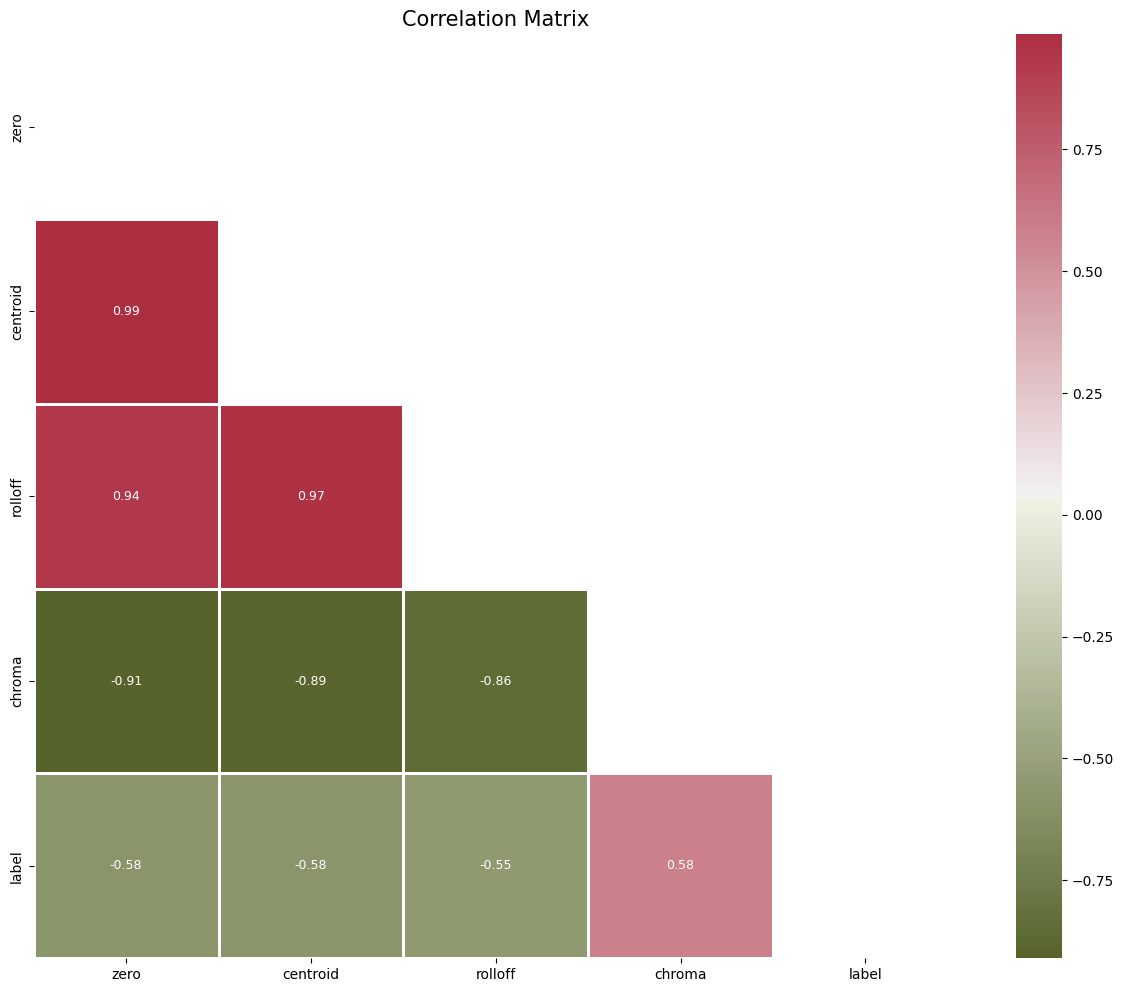

In [60]:
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
mask = np.triu(np.ones_like(audio_df["zero,centroid,rolloff,chroma,label".split(',')].corr(), dtype=bool))        #makes one mask
plt.figure(figsize=(15, 12))

sns.heatmap(audio_df["zero,centroid,rolloff,chroma,label".split(',')].corr(), annot=True, cmap=cmap, fmt='.2f', mask = mask, linewidths=1, square=True, annot_kws={"size": 9} )
plt.title('Correlation Matrix', fontsize=15)
plt.show()

In [62]:
if "centroid" in audio_df.columns:
    audio_df.drop("centroid", axis=1, inplace=True)
else:
    print("The column 'centroid' does not exist in the DataFrame.")


The column 'centroid' does not exist in the DataFrame.


In [63]:
num_var= audio_df["zero,rolloff,chroma".split(',')]

In [64]:
def plot_pair(df_train,num_var,target,plotname):
    '''
    Funtion to make a pairplot:
    df_train: total data
    num_var: a list of numeric variable
    target: target variable
    '''
    g = sns.pairplot(data=df_train, x_vars=num_var, y_vars=num_var, hue=target, corner=True)
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper center'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    plt.show()

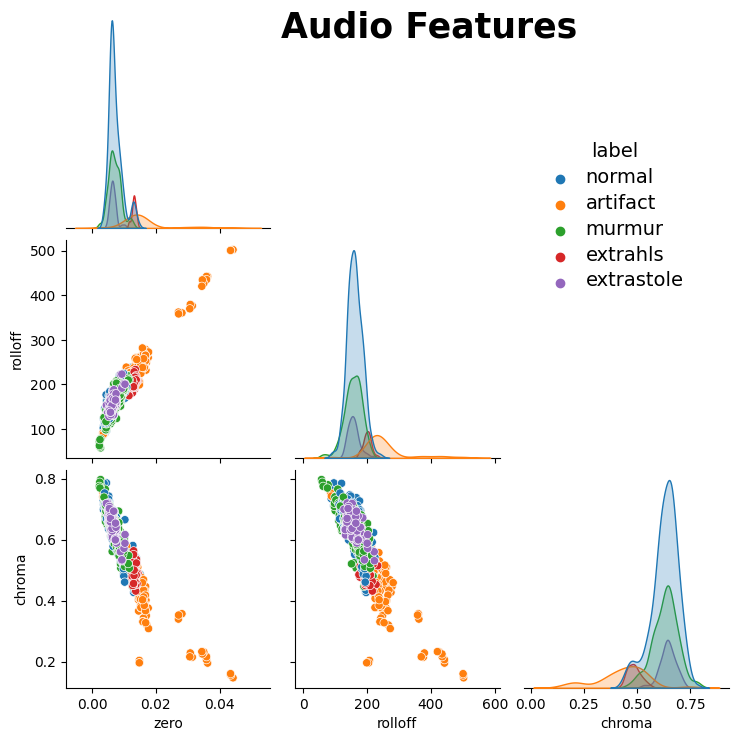

In [65]:
plot_pair(audio_df_cp, num_var, "label", "Audio Features")

In [66]:
audio_df.head()

mfcc0  mfcc1  mfcc2  mfcc3  mfcc4  mfcc5  mfcc6  mfcc7  mfcc8  mfcc9  ...  \
0 -536.39  53.56  51.67  49.58  46.87  43.63  39.89  35.82  31.55  27.20  ...   
1 -573.40  53.31  51.28  49.18  46.51  43.28  39.63  35.59  31.35  27.04  ...   
2 -572.10  53.97  52.12  49.82  47.07  43.80  40.07  35.96  31.64  27.32  ...   
3 -809.35  56.36  53.94  50.06  44.97  38.95  32.34  25.48  18.73  12.36  ...   
4 -850.73  59.58  57.00  52.88  47.47  41.09  34.10  26.87  19.77  13.11  ...   

   mfcc123  mfcc124  mfcc125  mfcc126  mfcc127  zero  rolloff  chroma  label  \
0    -0.07    -0.08    -0.07    -0.05    -0.03  0.00    90.61    0.74      4   
1    -0.14    -0.13    -0.13    -0.10    -0.05  0.00    95.80    0.71      4   
2    -0.03    -0.03    -0.02    -0.03    -0.02  0.00    87.78    0.74      4   
3     0.08     0.07     0.06     0.04     0.02  0.01   199.15    0.48      4   
4     0.05     0.04     0.03     0.02     0.01  0.01   195.59    0.43      4   

                                   file  
0              normal__201101151127.wav  
1  normal__201101151127.wav_stretch_0.8  
2  normal__201101151127.wav_stretch_1.2  
3              normal__201102201230.wav  
4  normal__201102201230.wav_stretch_0.8  

[5 rows x 133 columns]

In [67]:
audio_df.drop("file", axis=1, inplace= True)

In [68]:
X = audio_df.drop("label", axis=1)
y= audio_df.label

In [69]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train,y_test = train_test_split(scaledX,y,random_state=42, train_size=0.8, shuffle=True)

In [71]:
X_train.shape , y_train.shape

((969, 131), (969,))

In [72]:
X_test.shape , y_test.shape

((243, 131), (243,))

In [73]:
scores = cross_val_score(HistGradientBoostingClassifier(), X , y, cv=5)

In [88]:
scores

array([0.83950617, 0.86831276, 0.81404959, 0.83471074, 0.8553719 ])

In [89]:
scores.mean()

0.8423902322892222

In [74]:
model = HistGradientBoostingClassifier().fit(X_train,y_train)

In [75]:
y_pred = model.predict(X_test)

<h3>Accuracy score 

In [76]:
report_dict = classification_report(y_test, y_pred, output_dict= True)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.67      0.43      0.52        14
           2       0.33      0.06      0.10        17
           3       0.88      0.76      0.82        55
           4       0.78      0.92      0.84       132

    accuracy                           0.81       243
   macro avg       0.72      0.64      0.65       243
weighted avg       0.78      0.81      0.78       243



In [77]:
audio_df.label.value_counts()

label
4    648
3    306
0    120
2     93
1     45
Name: count, dtype: int64

In [78]:
ycp = y_test

In [79]:
y_pred = pd.Series(y_pred)
y_test = pd.Series(ycp)

In [80]:
y_test

801    4
677    4
43     4
990    3
70     4
      ..
904    4
673    4
708    4
367    4
464    4
Name: label, Length: 243, dtype: int64

In [81]:
y_pred = y_pred.map({4:"normal" , 3:"murmur" ,0: "artifact" , 2: "extrastole" , 1:"extrahls"})
y_test = y_test.map({4:"normal" , 3:"murmur" ,0: "artifact" , 2: "extrastole" , 1:"extrahls"})

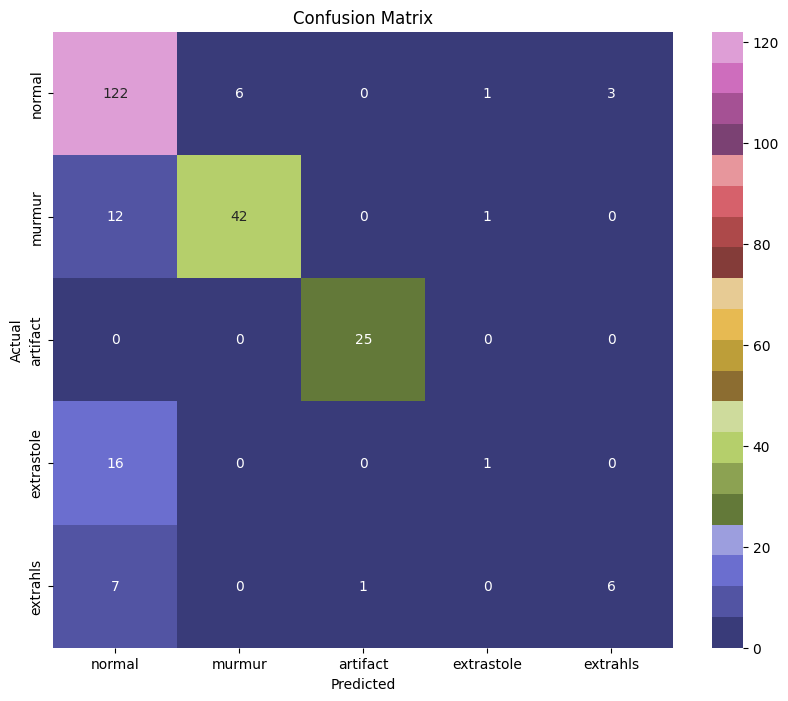

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["normal", "murmur", "artifact", "extrastole", "extrahls"]

conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= "tab20b", cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
!pip install joblib
import joblib

filename = "hb.pkl"

joblib.dump(model, filename)


['hb.pkl']